In [1]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

# Exploratory Analysis
## In this analysis I will try to find patterns and trends regarding robbery in Rio de Janeiro in order to aware citizens and tourists about the danger in the whole State.
### For this analysis I will follow some steps to find the answers to my questions 

### Steps:
* Data Understanding
* Data Preparation
* Data Visualization
* Conclusion with questions to answer


# Questions
* How dangerous is Rio De Janeiro for citizens and tourists?
* What are criminals stealing the most? 
* What is the progression of criminal events?

# 01.Data Understanding

In [2]:
#import the data that I translated to english 
df= pd.read_csv('monthly_historical_crimes_in_Rio_De_Janeiro.csv')

In [3]:
df.head()

,year,month,intentional_homicide,death_by_physical_injury,robbery_with_fatal_violence,violent_fatalities,homicide_by_police_action,violent_lethality,attempted_homicide,intentional_bodily_injury,...,notification_of_infringement_of_rights_by_the_police,notification_of_infringement_of_rights_by_the_police.1,threat,missing_people,discovered_corpse,discovered_human_remains,police_officers_killed_on_duty,civilian_police_employees_killed_on_duty,crime_reports,phase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,...,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,...,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,...,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,...,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,...,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


In [4]:
df.describe

<bound method NDFrame.describe of      year  month  intentional_homicide  death_by_physical_injury  \
0    1991      1                   657                       NaN   
1    1991      2                   732                       NaN   
2    1991      3                   713                       NaN   
3    1991      4                   634                       NaN   
4    1991      5                   650                       NaN   
..    ...    ...                   ...                       ...   
385  2023      2                   305                       4.0   
386  2023      3                   343                       5.0   
387  2023      4                   278                       5.0   
388  2023      5                   296                       1.0   
389  2023      6                   250                       3.0   

     robbery_with_fatal_violence  violent_fatalities  \
0                             15                 NaN   
1                             17     

In [5]:
df.columns

Index(['year', 'month', 'intentional_homicide', 'death_by_physical_injury',
       'robbery_with_fatal_violence', 'violent_fatalities',
       'homicide_by_police_action', 'violent_lethality', 'attempted_homicide',
       'intentional_bodily_injury', 'rape', 'negligent_homicide',
       'negligent_bodily_injury', 'street_robbery', 'cellphone_robbery',
       'robbery_in_public_transport', 'street_robbery.1', 'vehicle_robbery',
       'cargo_theft', 'commercial_establishment_robbery',
       'residential_robbery', 'bank_robbery', 'ATM_robbery',
       'robbery_during_withdrawal', 'post_withdrawal_robbery',
       'bicycle_robbery', 'other_robberies', 'total_robberies',
       'motor_vehicle_theft', 'pedestrian_theft', 'public_transport_theft',
       'cellphone_theft', 'bicycle_theft', 'other_thefts', 'total_thefts',
       'kidnapping', 'extortion', 'express_kidnapping', 'fraud',
       'drug_seizure', 'drug_possession', 'drug_trafficking',
       'drug_seizure_without_authorization', 

# 02.Data preparation

In [6]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

In [7]:
df_2000 = df[df['year'] >= 2000]

In [8]:
df_2000_corr = df_2000[['street_robbery', 'cellphone_robbery',
       'robbery_in_public_transport', 'street_robbery.1', 'vehicle_robbery',
       'cargo_theft', 'commercial_establishment_robbery',
       'residential_robbery', 'bank_robbery', 'ATM_robbery',
       'robbery_during_withdrawal', 'post_withdrawal_robbery',
       'bicycle_robbery', 'other_robberies',
       'motor_vehicle_theft', 'pedestrian_theft', 'public_transport_theft',
       'cellphone_theft', 'bicycle_theft']].corr()

# 03.Data Visualization

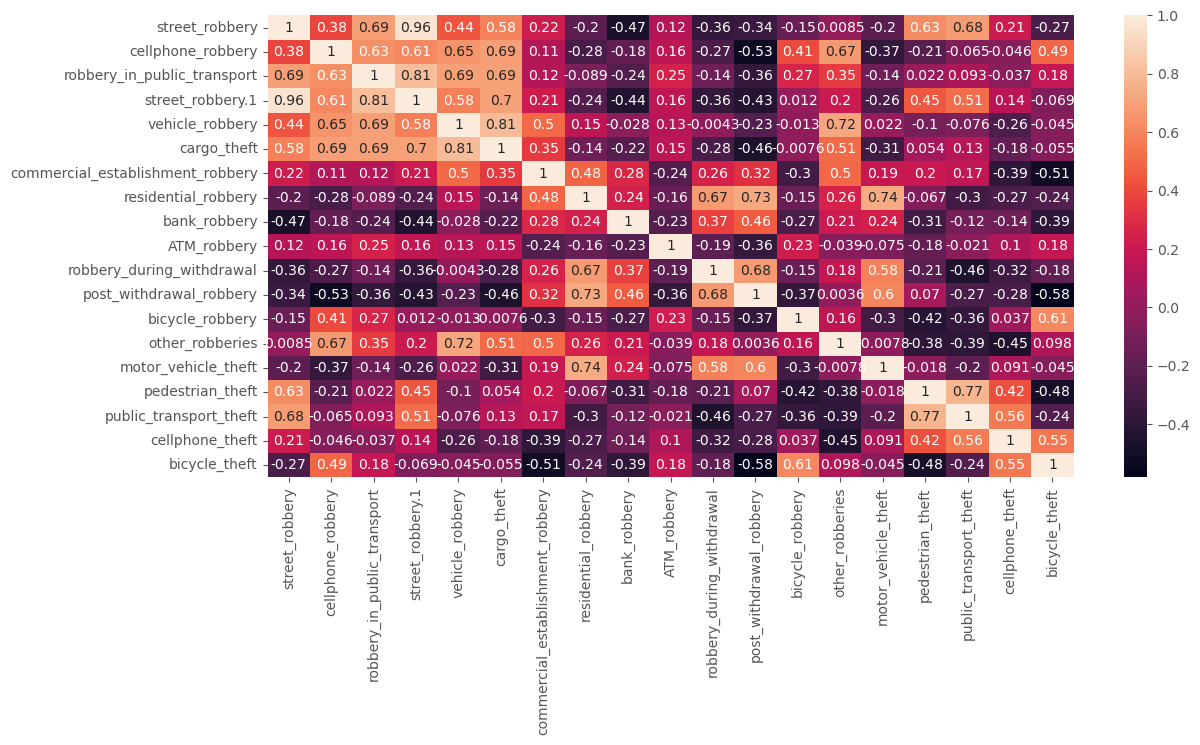

In [9]:
plt.figure(figsize=(13,6))
sns.heatmap(df_2000_corr, annot=True)
plt.show()

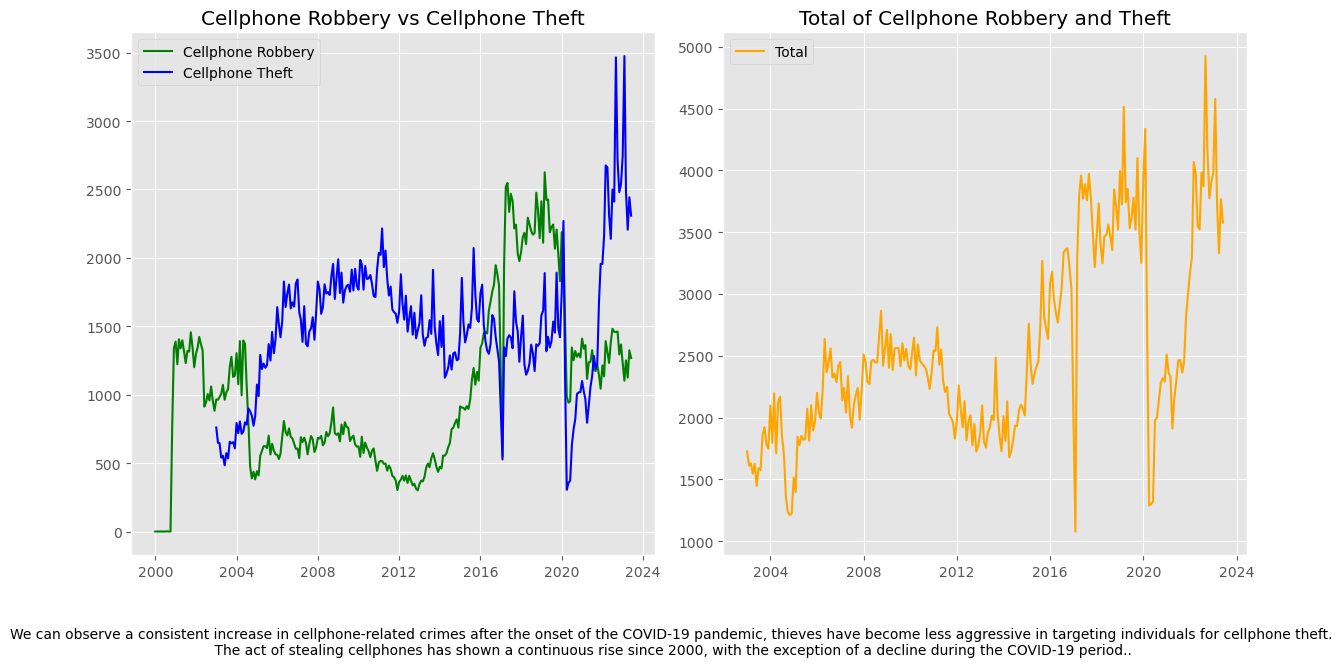

In [10]:
# Extract data
y = df_2000['cellphone_robbery']
y2 = df_2000['cellphone_theft']
x = df_2000['date']
y_total = y + y2

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot on the first subplot
axes[0].plot(x, y, color='green', label='Cellphone Robbery')
axes[0].plot(x, y2, color='blue', label='Cellphone Theft')
axes[0].set_title('Cellphone Robbery vs Cellphone Theft')
axes[0].legend()

# Plot on the second subplot
axes[1].plot(x, y_total, color='orange', label='Total')
axes[1].set_title('Total of Cellphone Robbery and Theft')
axes[1].legend()
# Add explanation below the subplots

explanation = "We can observe a consistent increase in cellphone-related crimes after the onset of the COVID-19 pandemic, thieves have become less aggressive in targeting individuals for cellphone theft.\n The act of stealing cellphones has shown a continuous rise since 2000, with the exception of a decline during the COVID-19 period.."
fig.text(0.5, -0.1, explanation, ha='center')


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

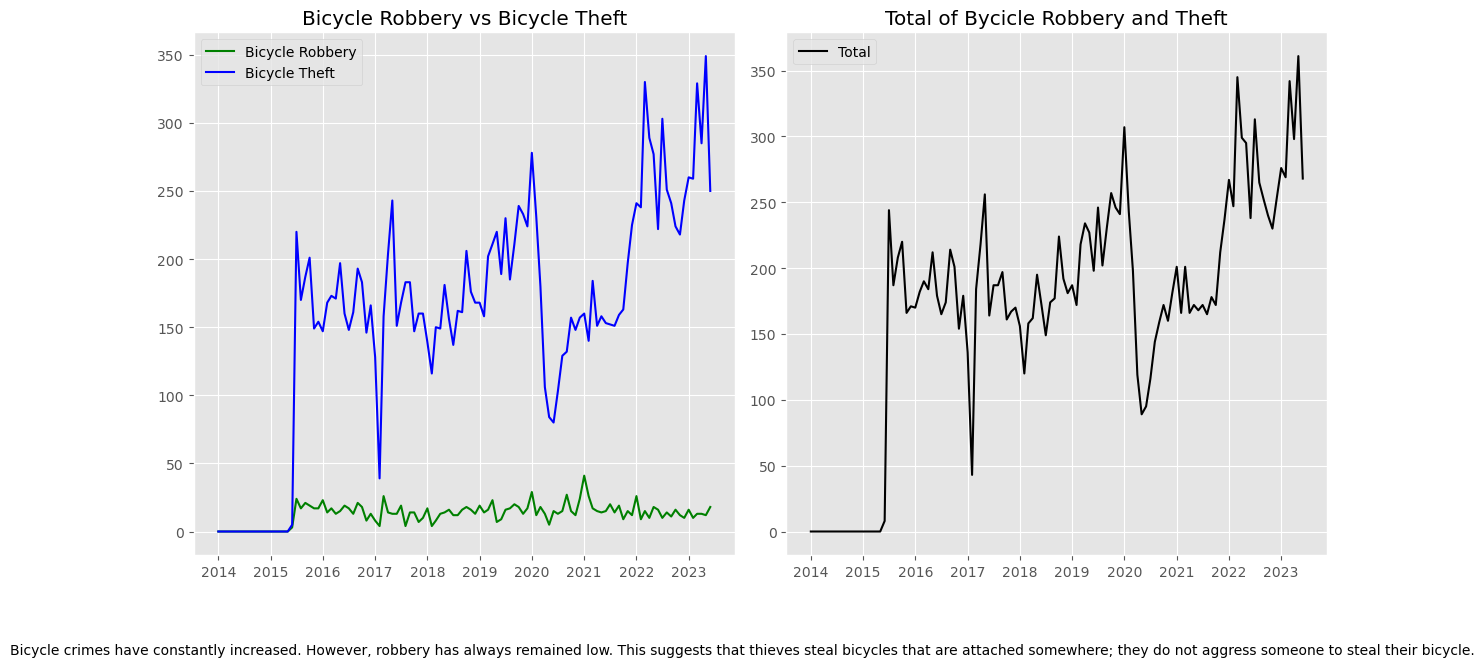

In [11]:
#extract data 
y = df_2000['bicycle_robbery']
y2 = df_2000['bicycle_theft']
x = df_2000['date']
total = y + y2

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

#First plot
axes[0].plot(x,y, color='green', label='Bicycle Robbery')
axes[0].plot(x,y2, color='blue', label='Bicycle Theft')
axes[0].set_title('Bicycle Robbery vs Bicycle Theft')
axes[0].legend()

#Second plot 
axes[1].plot(x, total, color = 'black', label='Total')
axes[1].set_title('Total of Bycicle Robbery and Theft')
axes[1].legend()

explaination = 'Bicycle crimes have constantly increased. However, robbery has always remained low. This suggests that thieves steal bicycles that are attached somewhere; they do not aggress someone to steal their bicycle.'
fig.text(0.5,-0.1, explaination, ha="center")
plt.tight_layout()
plt.show()

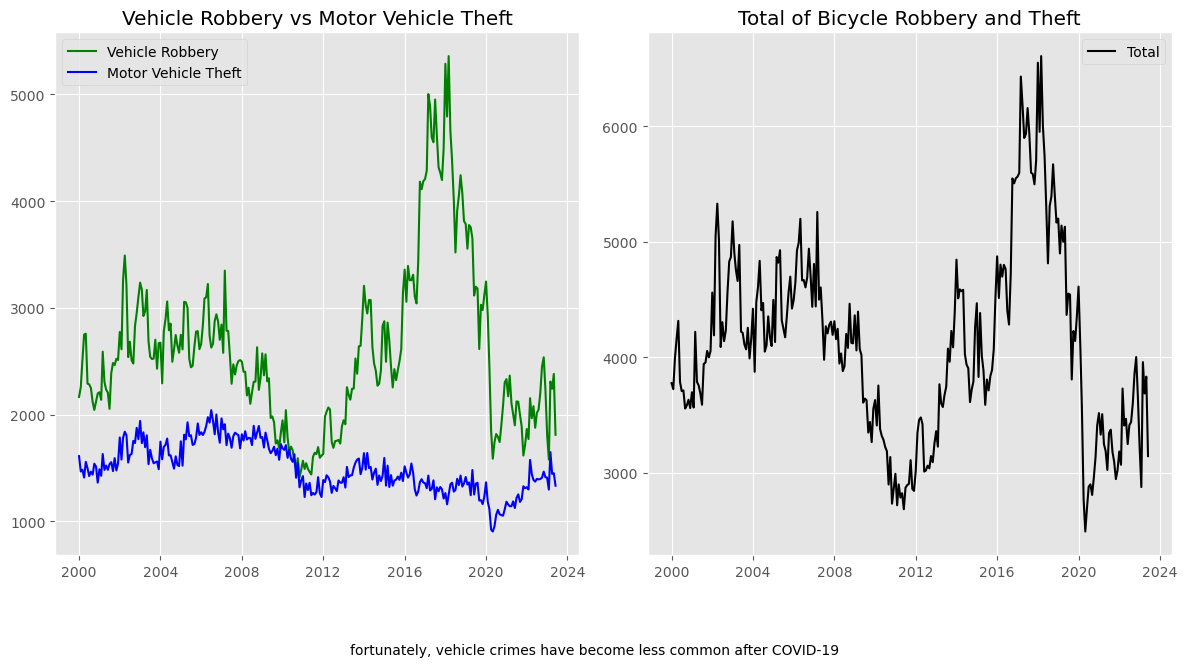

In [12]:
#extract data 
y = df_2000['vehicle_robbery']
y2 = df_2000['motor_vehicle_theft']
x = df_2000['date']
total = y + y2

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

#First plot
axes[0].plot(x,y, color='green', label='Vehicle Robbery')
axes[0].plot(x,y2, color='blue', label='Motor Vehicle Theft')
axes[0].set_title('Vehicle Robbery vs Motor Vehicle Theft')
axes[0].legend()

#Second plot 
axes[1].plot(x, total, color = 'black', label='Total')
axes[1].set_title('Total of Bicycle Robbery and Theft')
axes[1].legend()

explaination= "fortunately, vehicle crimes have become less common after COVID-19"
fig.text(0.5,-0.1, explaination, ha="center")

plt.tight_layout()
plt.show()

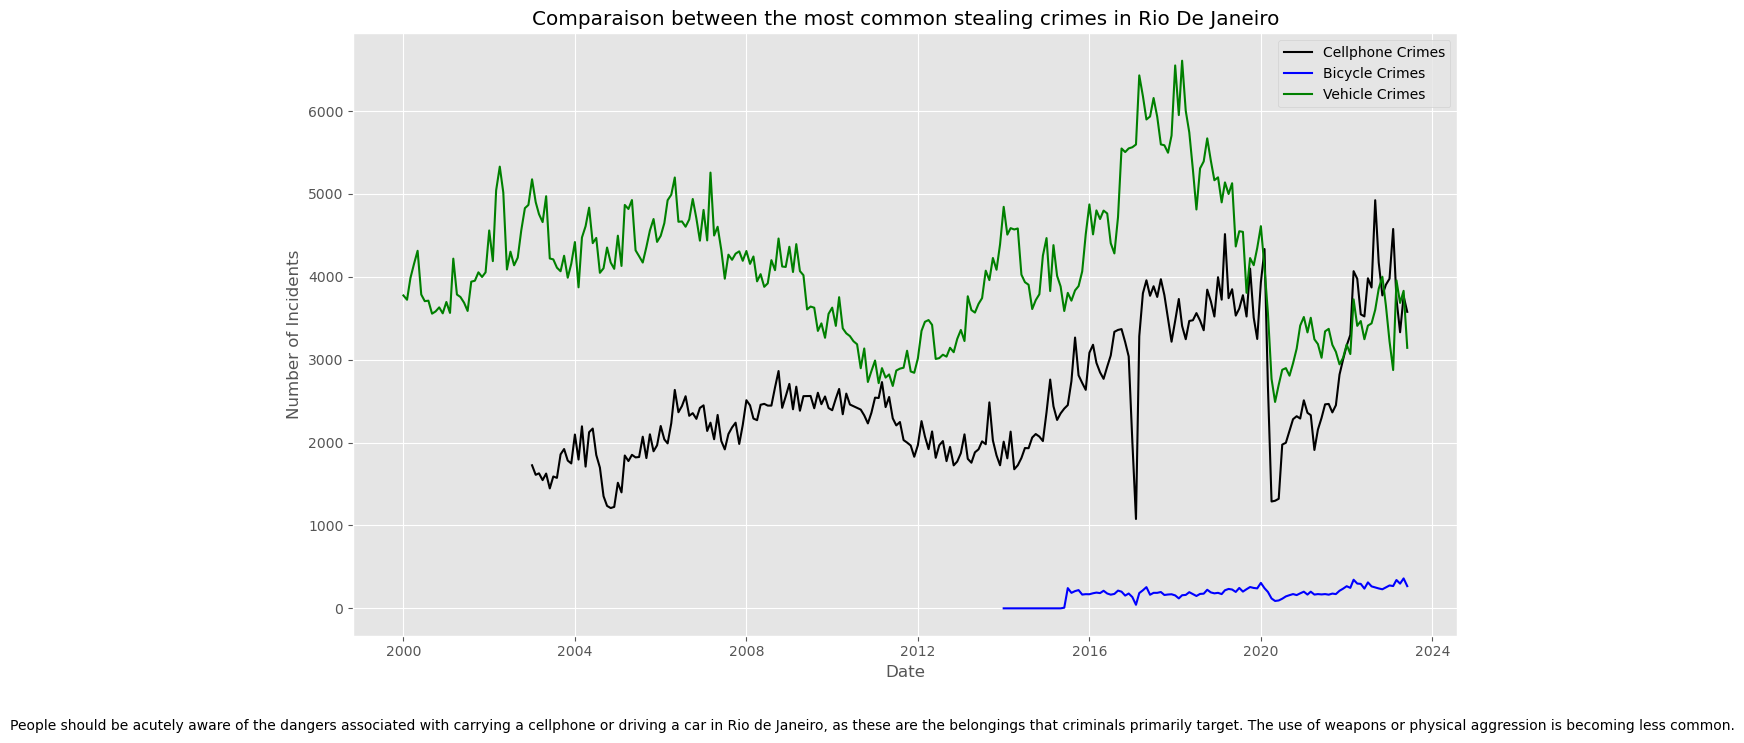

In [13]:
x = df_2000['date']

y_cellphone = df_2000['cellphone_robbery']
y2_cellphone = df_2000['cellphone_theft']
y_total_cellphone = y_cellphone + y2_cellphone

y_bicycle = df_2000['bicycle_robbery']
y2_bicycle = df_2000['bicycle_theft']
y_total_bicycle = y_bicycle + y2_bicycle

y_vehicle = df_2000['vehicle_robbery']
y2_vehicle = df_2000['motor_vehicle_theft']
y_total_vehicle = y_vehicle + y2_vehicle


plt.figure(figsize=(12,7))
plt.plot(x, y_total_cellphone, label='Cellphone Crimes', color='black')
plt.plot(x, y_total_bicycle, label='Bicycle Crimes', color= "blue")
plt.plot(x, y_total_vehicle, label='Vehicle Crimes', color='green')
plt.title('Comparaison between the most common stealing crimes in Rio De Janeiro')
explanation = "People should be acutely aware of the dangers associated with carrying a cellphone or driving a car in Rio de Janeiro, as these are the belongings that criminals primarily target. The use of weapons or physical aggression is becoming less common."
plt.figtext(0.5,-0.05, explanation, ha='center')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.tight_layout()
plt.show()


# 05.Conclusion

## Thieves predominantly focus on cellphones and motor vehicles in Rio de Janeiro. Despite criminals being less aggressive, criminal activities have been on the rise since 2000. Everyone in Rio de Janeiro should exercise greater vigilance regarding their belongings and ensure they are adequately protected, particularly cellphones and cars.